<a href="https://colab.research.google.com/github/DSLUCIFER/Network-intrusion-detection/blob/main/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
#%run svm_algorithm.ipynb
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import socket
import struct
import os

In [2]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.2, lambda_param=0.01, n_iters=10):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_binary = np.where(y == 'A', 1, 0)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_binary[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_binary[idx]))
                    self.b -= self.lr * y_binary[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [3]:
# Load dataset
df = pd.read_csv('final.csv')

In [4]:
df.shape

(149043, 14)

In [6]:
print(df.columns)

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')


In [7]:
df.head()

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS


In [8]:
df.dtypes

Time              int64
Protcol          object
Flag             object
Family           object
Clusters          int64
SeddAddress      object
ExpAddress       object
BTC               int64
USD               int64
Netflow_Bytes     int64
IPaddress        object
Threats          object
Port              int64
Prediction       object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


<Axes: >

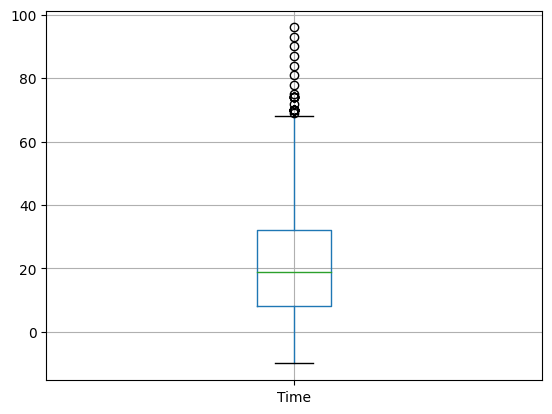

In [10]:
df.boxplot(column='Time')

<Axes: >

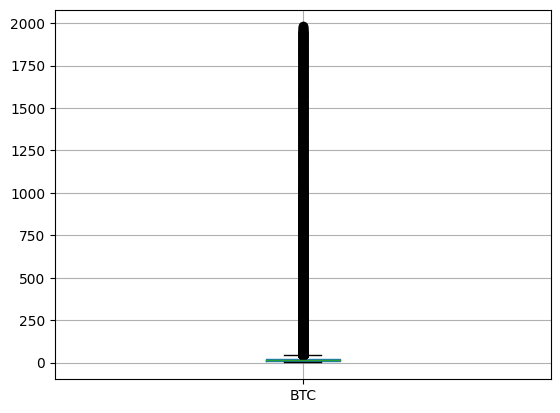

In [11]:
df.boxplot(column='BTC')

<Axes: >

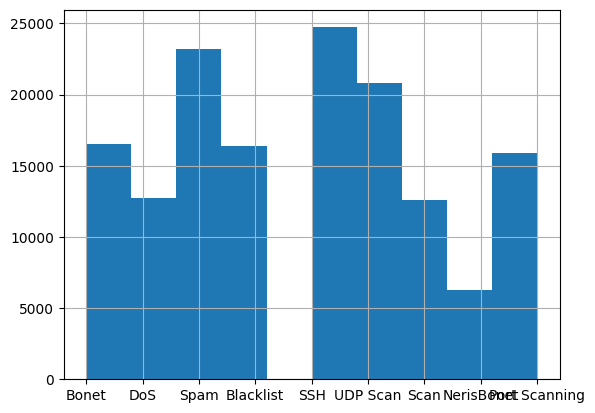

In [12]:
df['Threats'].hist()

In [13]:
encoder = LabelEncoder()
df['Protcol'] = encoder.fit_transform(df['Protcol'])
df['Flag'] = encoder.fit_transform(df['Flag'])
df['Family'] = encoder.fit_transform(df['Family'])
df['Threats'] = encoder.fit_transform(df['Threats'])
df['SeddAddress'] = encoder.fit_transform(df['SeddAddress'])
df['ExpAddress'] = encoder.fit_transform(df['ExpAddress'])
df['Time'] = encoder.fit_transform(df['Time'])
df['IPaddress'] = encoder.fit_transform(df['IPaddress'])
df['Prediction'] = np.where(df['Prediction'] == 'A' , 1, 0)

# Split data into features and target
X = df.drop('Prediction', axis=1)
y = df['Prediction']

In [14]:
# Function to preprocess data
def preprocess_data(df):
    # Convert categorical variables into dummy/indicator variables
    df = pd.get_dummies(df, columns=['Protcol', 'Flag', 'Family','Time', 'IPaddress'])

    # Split data into features and target
    X = df.drop('Prediction', axis=1)
    y = df['Prediction']

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

In [15]:
# Function to predict intrusion
def predict_intrusion(model, X):
    return model.predict(X)

In [16]:
# Preprocess data
X, y = preprocess_data(df)

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [18]:
# Train SVM model
svm = SVM()
svm.fit(X_train, y_train)

In [19]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)

In [20]:
print(y_train)

15677     0
110004    0
23773     0
32993     1
28874     1
         ..
144628    0
58266     0
81891     0
25324     1
65689     1
Name: Prediction, Length: 104330, dtype: int64


In [21]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.717106881667524
